<a href="https://colab.research.google.com/github/CleristonLima/Python/blob/main/Cartao_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Obtendo a base de dados**

In [1]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [2]:
# Para saber os NaN

missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
# Vai completar os valores null (NaN) pela mediana

dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)

In [6]:
# Importando o KMeans
# n_init -> Serve para forçar o KMeans retornar a quantidade de vezes o mesmo valor
# n_clusters -> É a quantidade de cluster definido no KMeans 
# max_iter -> Defini o numero de interações no KMeans

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# **Criterios de validação**

**Calculando Silhuette**

In [7]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36460047166491


**Matematica de Davies-Bouldin**

In [8]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0754351347520612


**Matematica do Calinski**

In [9]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.784472502021


# **Validando os cluster**

**Validação Relativa**

In [10]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)

  return s, dbs, calinski

In [11]:
# Para chamar a função com diferentes clusters com base no silhuette

s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3271718523559296 1.310409951916838 3526.454518249131


In [12]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644845919974304 1.0757138590613295 3431.7937428414293


In [13]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.35141961530502236 1.1165841979346158 3019.193538301042


In [14]:
s4, dbs4, calinski4 = clustering_algorithm(50, values)
print(s4, dbs4, calinski4)

0.24919712355355622 1.240374514068078 1610.9743918923239


**A Estrutura dos cluster**

In [15]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [16]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03948776330871761 3.536109979914569 304.03421540661714
0.3644845919974304 1.0757138590613295 3431.7937428414293


**A estabilidade dos cluster**

In [17]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.3539831746159207 1.1396268152633489 1194.9384641787258
0.3668564117315988 1.0993525253456349 1167.5313082261503


# **Visualizando os clusters**

**Gerando graficos**

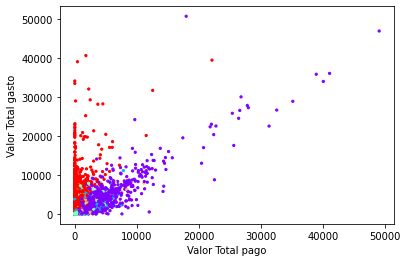

In [18]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor Total pago")
plt.ylabel("Valor Total gasto")
plt.show()

**Interpretação visual**

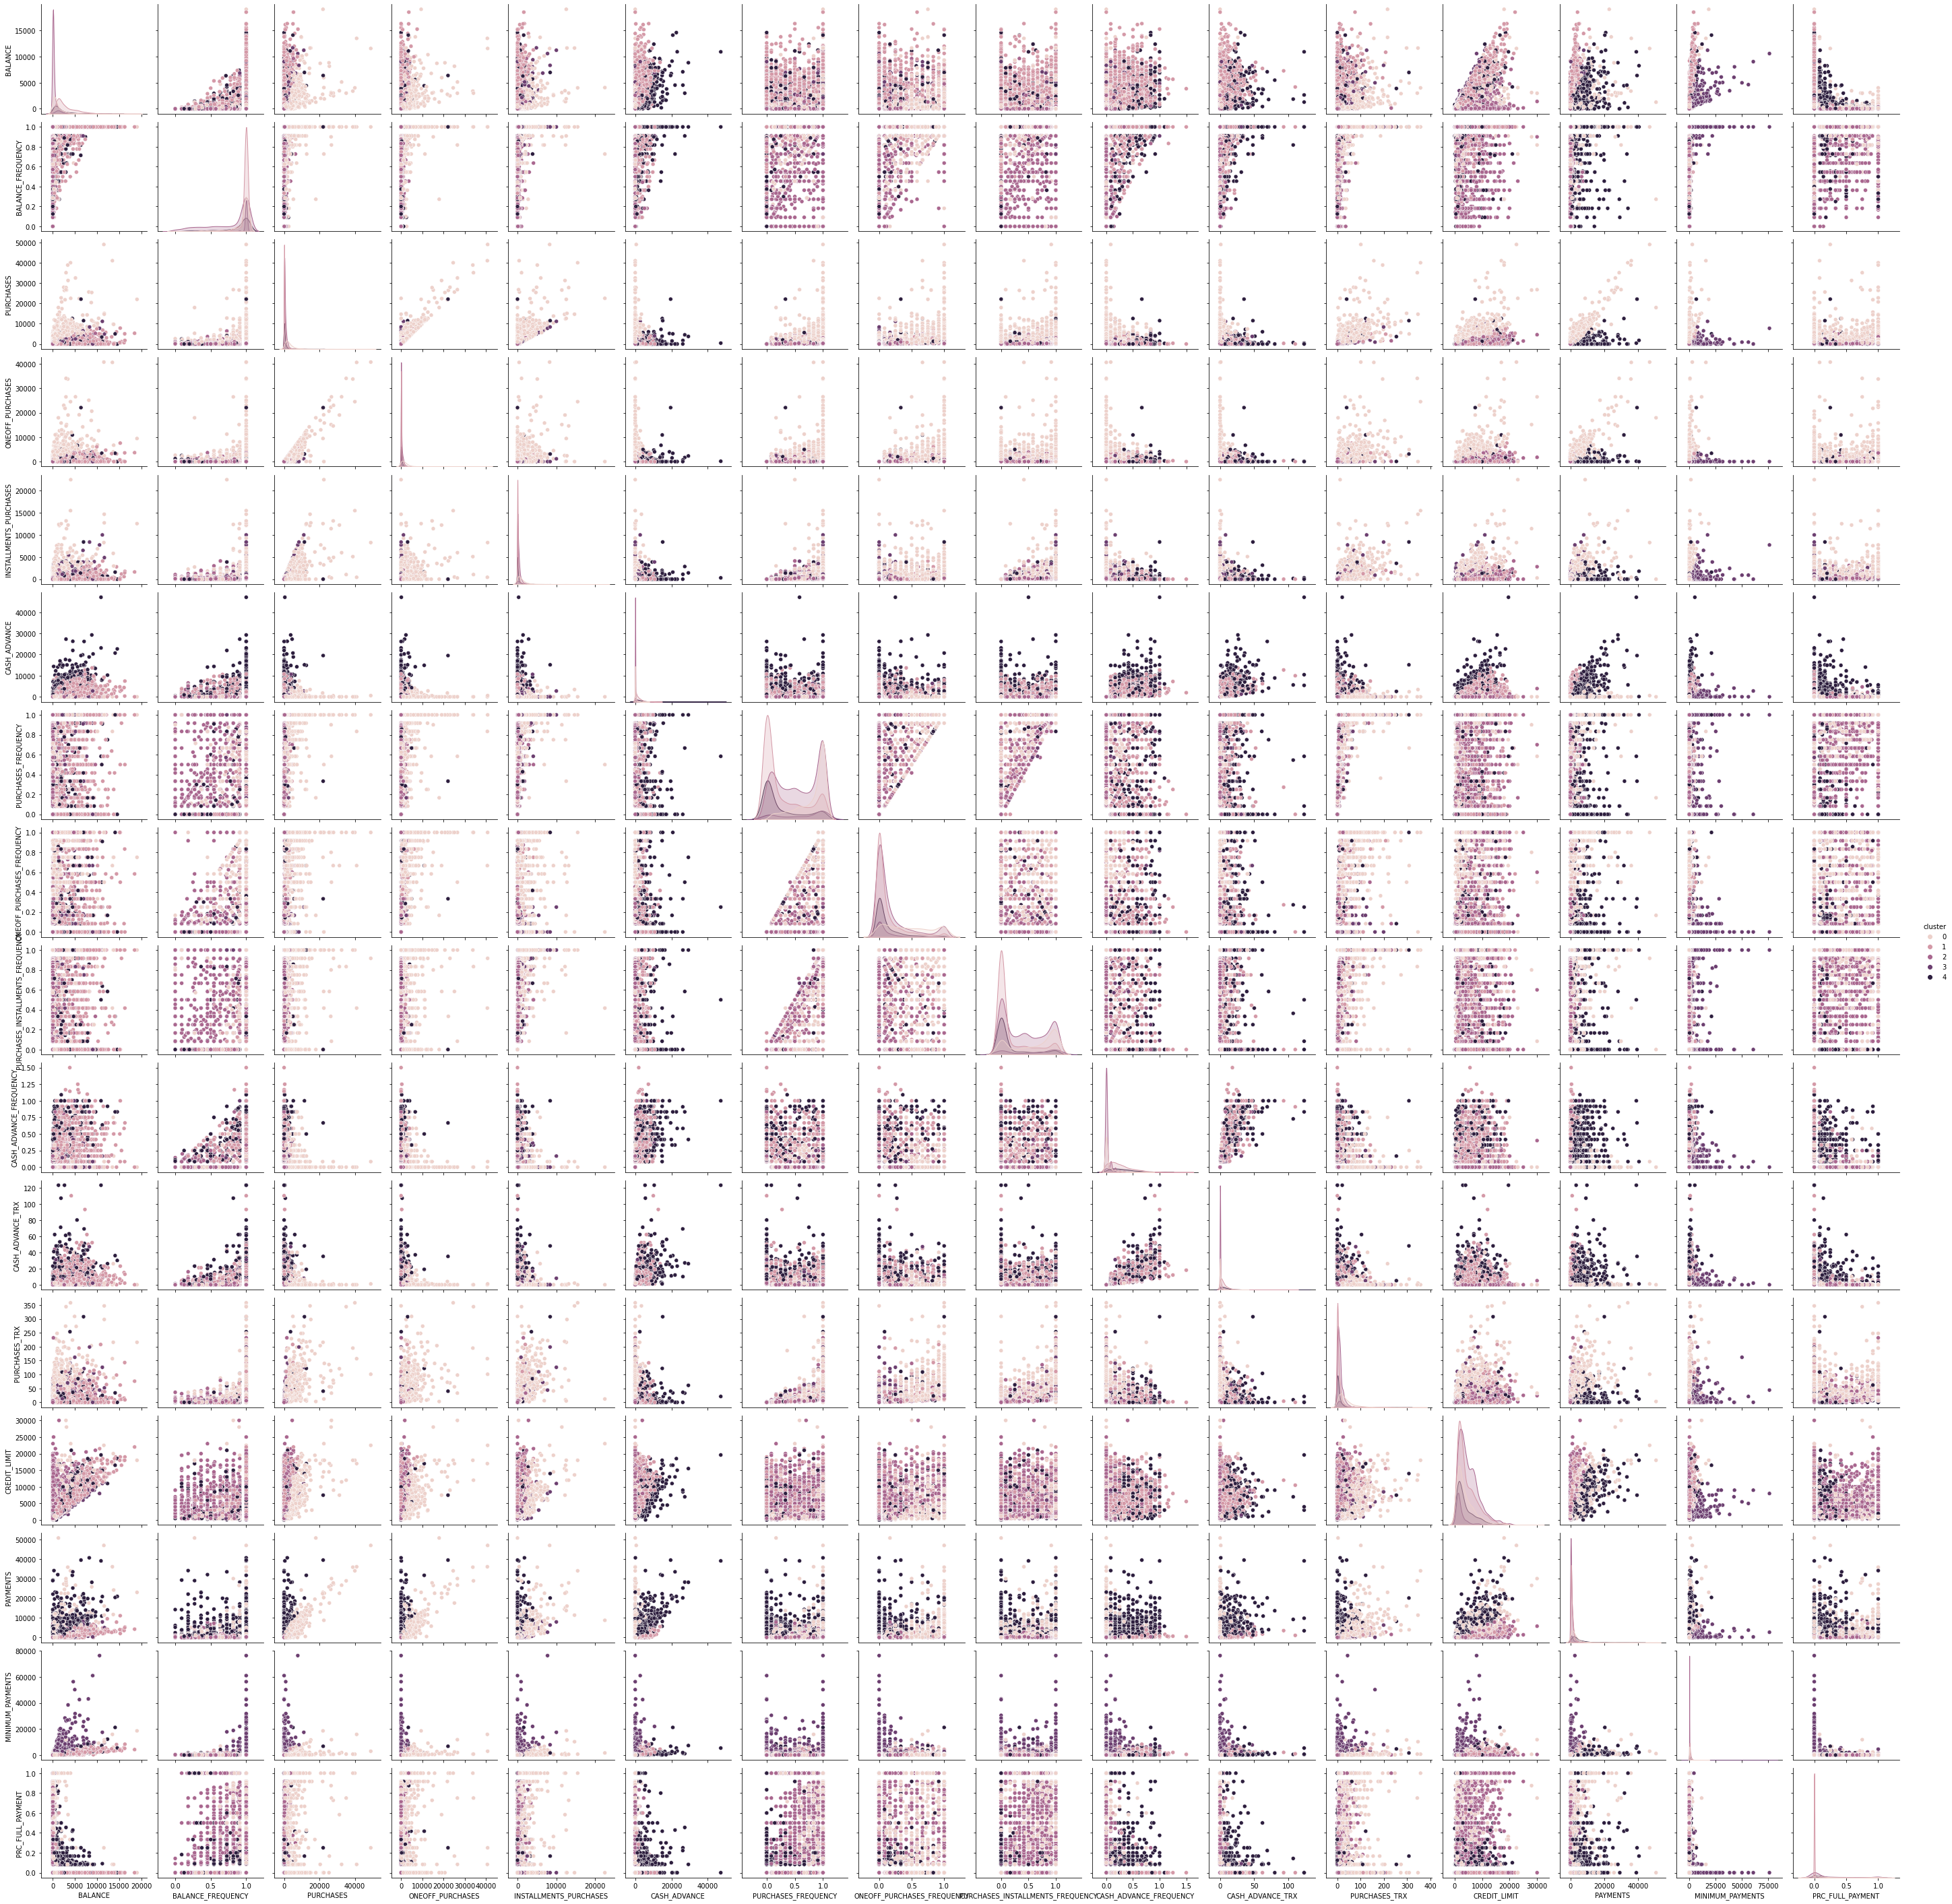

In [19]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

# **Entendendo os valores dos atributos no Cluster**

**Descrevendo os elementos**

In [21]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1537.0  1142.320861  1664.363459   0.000000   212.282538   
1        2651.0  3036.509818  2478.358491   6.824905  1257.895616   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3         408.0  1990.318603  1860.968409  70.794108  1016.567882   
4        1074.0  1796.066730  1981.709522   0.000000   507.348768   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         555.131027  1370.317105  19043.138560            1537.0  0.928267   
1        2171.222526  4223.849965  18495.558550            2651.0  0.963809   
2          82.941478   410.126095   9630.367575            3280.0  0.774389   
3        1326.681742  2149.639085  11670.179850             408.0  0.989409   
4        1092.020518  2319.052556  14581.459140            1074.0  0.862285   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       523.893953  18621.013310           1537.0  0.278150   
1        ...      1330.279644   8345.641905           2651.0  0.001798   
2        ...       248.733727   4483.503862           3280.0  0.246806   
3        ...      7184.162991  76406.207520            408.0  0.019460   
4        ...       885.787665  21235.065300           1074.0  0.117321   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367086  0.0  0.0  0.083333  0.545455  1.0  
1        0.023251  0.0  0.0  0.000000  0.000000  0.6  
2        0.346748  0.0  0.0  0.000000  0.444444  1.0  
3        0.091220  0.0  0.0  0.000000  0.000000  1.0  
4        0.186720  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

**Analisando os valores**

In [22]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.60217275e-01 2.45258545e-04 4.38567850e-01 2.57141814e-01
  1.81597658e-01 2.58559897e-02 2.04371792e-04 8.90426987e-05
  1.50570655e-04 9.38731157e-06 1.69791390e-04 6.17288930e-03
  6.03681606e-01 4.02502783e-01 8.56498262e-02 7.18989321e-05]
 [5.04526580e-01 2.72332745e-04 6.20171708e-02 3.64414607e-02
  2.55974069e-02 2.52329514e-01 6.75600478e-05 2.58663568e-05
  4.51550497e-05 5.73437494e-05 1.15422756e-03 1.33589087e-03
  7.18989200e-01 1.66362861e-01 1.79601509e-01 5.51886878e-07]
 [6.91003939e-02 2.30735820e-04 1.21488582e-01 4.79706676e-02
  7.36181130e-02 2.44793374e-02 1.72814707e-04 3.36627014e-05
  1.40285541e-04 7.93816793e-06 1.25005935e-04 2.86309441e-03
  9.43533996e-01 1.53766191e-01 5.68572256e-02 7.61261275e-05]
 [3.30293653e-01 2.68533239e-04 1.57028833e-01 3.42695419e-02
  1.23148700e-01 5.87967103e-02 1.66137163e-04 2.53359090e-05
  1.47502343e-04 1.95347549e-05 4.32007163e-04 3.86025028e-03
  3.74390286e-01 2.51594336e-01 6.83611752e-01 4.29215417e-06]
 [2.

**Selecionando os atributos**

In [25]:
# {:.4f}.format() -> Irá mostrar 4 casas depois da virgula

max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0362
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0549
PRC_FULL_PAYMENT 
0.0000


In [ ]:
BALANCE 0.0223
PURCHASES 0.0197
CASH_ADVANCE 0.0225
CREDIT_LIMIT 0.0362
PAYMENTS 0.0279

**Filtrando os valores**

In [34]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description.mean())

BALANCE         1681.792554
PURCHASES       1124.331047
CASH_ADVANCE    1130.201755
CREDIT_LIMIT    3986.898575
PAYMENTS        2174.069436
n_clients       1790.000000
dtype: float64


<ipython-input-34-6e70872f26f8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


# **Interpretando os clusters**

**Interpretando os clusters**

In [ ]:
CLUSTER 0: Clientes que gastam pouco. Clientes com maior limite. Bons pagadores. Maior numero de clientes
CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.
CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.
CLUSTER 3: Clientes que gastam muito com saques. Pagam ass vezes.
CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [35]:
# Pegando os atributos para ver se ajuda na analise.

dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        1537.0  0.278150  0.367086  0.0  0.0  0.083333  0.545455  1.0
1        2651.0  0.001798  0.023251  0.0  0.0  0.000000  0.000000  0.6
2        3280.0  0.246806  0.346748  0.0  0.0  0.000000  0.444444  1.0
3         408.0  0.019460  0.091220  0.0  0.0  0.000000  0.000000  1.0
4        1074.0  0.117321  0.186720  0.0  0.0  0.083333  0.142857  1.0

**Os padrões de cada cluster**

**Utilizando os clusters**